In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [17]:
df=pd.read_csv('covid-19(India).csv')
#df['Date']=pd.to_datetime(df.Date)
#df.sort_values(by='Date')
data=df.groupby(['Date'], sort=False)['Infected'].agg(np.sum).reset_index()
data['confirmed']=data['Infected'].cumsum()
data

,Date,Infected,confirmed
0,03-02-2020,3,3
1,02-03-2020,2,5
2,03-03-2020,2,7
3,04-03-2020,20,27
4,05-03-2020,1,28
...,...,...,...
65,08-05-2020,3311,59663
66,09-05-2020,3254,62917
67,10-05-2020,4719,67636
68,11-05-2020,3181,70817


In [18]:
data['days']=np.arange(0, len(data), 1)
data=data[['days', 'confirmed']]
data

,days,confirmed
0,0,3
1,1,5
2,2,7
3,3,27
4,4,28
...,...,...
65,65,59663
66,66,62917
67,67,67636
68,68,70817


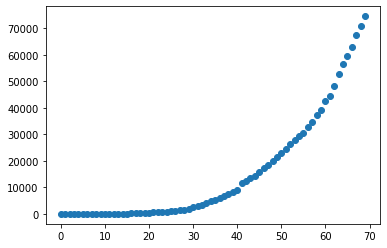

In [19]:

plt.scatter(data['days'], data['confirmed'])


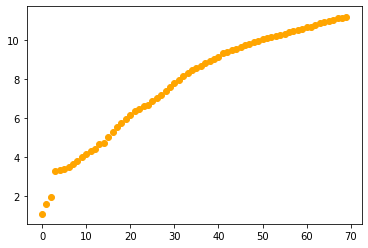

In [20]:
plt.scatter(data['days'], np.log(data['confirmed']), color='orange')

In [21]:
X, Y=np.array(data['days']).reshape(-1, 1), np.array(np.log(data['confirmed'])).reshape(-1, 1)
reg=LinearRegression()
reg.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

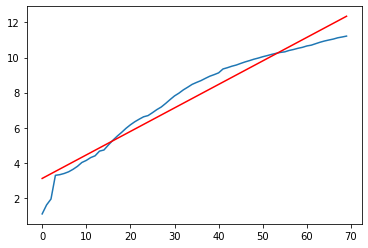

In [22]:
plt.plot(X, Y)
Y_pred=reg.predict(X)
prediction_space= ([min(X), max(X)])
plt.plot(prediction_space, [min(Y_pred), max(Y_pred)], color='red')

m=(max(Y_pred)-min(Y_pred))/(max(X)-min(X))

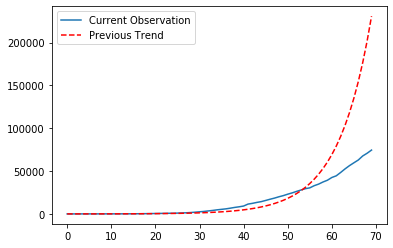

In [23]:
plt.plot(data['days'], data['confirmed'], label='Current Observation')
Y_pred=np.exp(reg.predict(X))
plt.plot(X, Y_pred, color='red', linestyle='dashed', label='Previous Trend')
plt.legend()

In [24]:
test=np.arange(len(data), len(data)+21, 1)
reg.score(X, Y)

0.947717621731502

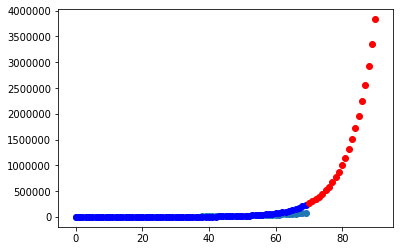

In [25]:
plt.scatter(data['days'], data['confirmed'])
Y_pred=np.exp(reg.predict(X))
plt.scatter(X, Y_pred, color='blue')
plt.scatter(test, np.exp(reg.predict(test.reshape(-1, 1))), color='red')

In [26]:
future=np.arange(len(data), len(data)+21, 1)
predictions=np.exp(reg.predict(future.reshape(-1, 1)))
future, predictions

(array([70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86,
        87, 88, 89, 90]),
 array([[ 263715.31038196],
        [ 301464.03674945],
        [ 344616.18979059],
        [ 393945.22658929],
        [ 450335.3183923 ],
        [ 514797.19845147],
        [ 588486.27835718],
        [ 672723.35757929],
        [ 769018.29741233],
        [ 879097.08365559],
        [1004932.76309836],
        [1148780.80831418],
        [1313219.54464113],
        [1501196.36395928],
        [1716080.55359883],
        [1961723.6872817 ],
        [2242528.66054081],
        [2563528.60800462],
        [2930477.11705646],
        [3349951.3548538 ],
        [3829469.95715121]]))

In [27]:
dt=df.groupby(['Date'], sort=False)['Infected'].agg(np.sum).reset_index()
dt['confirmed']=dt['Infected'].cumsum()
#dt=dt.iloc[4:]
dt

,Date,Infected,confirmed
0,03-02-2020,3,3
1,02-03-2020,2,5
2,03-03-2020,2,7
3,04-03-2020,20,27
4,05-03-2020,1,28
...,...,...,...
65,08-05-2020,3311,59663
66,09-05-2020,3254,62917
67,10-05-2020,4719,67636
68,11-05-2020,3181,70817


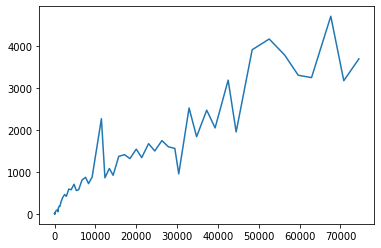

In [28]:
plt.plot(dt['confirmed'],dt['Infected'])

In [29]:
m

array([0.13378058])

In [30]:
1.0+m*14+m**2*24

array([3.30246189])